# Coursework 2: Fish Classification

Created by Athanasios Vlontzos and Wenjia Bai

In this coursework, you will be exploring the application of convolutional neural networks for image classification tasks. As opposed to standard applications such as object or face classification, we will be dealing with a slightly different domain, fish classification for precision fishing.

In precision fishing, engineers and fishmen collaborate to extract a wide variety of information about the fish, their species and wellbeing etc. using data from satellite images to drones surveying the fisheries. The goal of precision fishing is to provide the marine industry with information to support their decision making processes.

Here your will develop an image classification model that can classify fish species given input images. It consists of two tasks. The first task is to train a model for the following species:
- Black Sea Sprat
- Gilt-Head Bream
- Shrimp
- Striped Red Mullet
- Trout

The second task is to finetune the last layer of the trained model to adapt to some new species, including:
- Hourse Mackerel
- Red Mullet
- Red Sea Bream
- Sea Bass

You will be working using a large-scale fish dataset [1].

[1] O. Ulucan, D. Karakaya and M. Turkan. A large-scale dataset for fish segmentation and classification. Innovations in Intelligent Systems and Applications Conference (ASYU). 2020.

## Step 0: Download data.

[Download the Data from here -- make sure you access it with your Imperial account.](https://imperiallondon-my.sharepoint.com/:f:/g/personal/av2514_ic_ac_uk/EkA9HyXVvgdFoLI4P_IfO1cBO_CsvY1KN4NE8iuD-s_VlA?e=Ip03rF)

It is a ~2.5GB file. You can save the images and annotations directories in the same directory as this notebook or somewhere else.

The fish dataset contains 9 species of fishes. There are 1,000 images for each fish species, named as %05d.png in each subdirectory.

## Step 1: Load the data. (15 Points)

- Complete the dataset class with the skeleton below.
- Add any transforms you feel are necessary.

Your class should have at least 3 elements
- An ```__init__``` function that sets up your class and all the necessary parameters.
- An ```__len__``` function that returns the size of your dataset.
- An ```__getitem__``` function that given an index within the limits of the size of the dataset returns the associated image and label in tensor form.

You may add more helper functions if you want.

In this section we are following the Pytorch [dataset](https://pytorch.org/vision/stable/datasets.html) class structure. You can take inspiration from their documentation.

In [ ]:
# Dependencies
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Multiclass_labels_correspondances = {
    'Black Sea Sprat': 0,
    'Gilt-Head Bream': 1,
    'Shrimp': 2,
    'Striped Red Mullet': 3,
    'Trout': 4
}

classes = []

for i in Multiclass_labels_correspondances:
  classes.append(i)
  
print(classes)

['Black Sea Sprat', 'Gilt-Head Bream', 'Shrimp', 'Striped Red Mullet', 'Trout']


In [ ]:
# We will start by building a dataset class using the following 5 species of fishes


# The 5 species will contain 5,000 images in total.
# Let us split the 5,000 images into training (80%) and test (20%) sets
def split_train_test(lendata, percentage=0.8):
    #### ADD YOUR CODE HERE ####
    dataset = np.arange(lendata)
    train_no = int(percentage * lendata)
    idxs_train = np.random.choice(lendata, train_no, replace=False)
    idxs_test = np.delete(dataset, idxs_train)
    print(idxs_train.shape)
    print(idxs_test.shape)
    return idxs_train, idxs_test

LENDATA = 5000
np.random.seed(42)
idxs_train, idxs_test = split_train_test(LENDATA,0.8)

# Implement the dataset class
class FishDataset(Dataset):
    def __init__(self,
                 path_to_images,
                 idxs_train,
                 idxs_test,
                 transform_extra=None,
                 img_size=128,
                 train=True):
        # path_to_images: where you put the fish dataset
        # idxs_train: training set indexes
        # idxs_test: test set indexes
        # transform_extra: extra data transform
        # img_size: resize all images to a standard size
        # train: return training set or test set
        
        # Load all the images and their labels
        #### ADD YOUR CODE HERE ####
        # 'Black Sea Sprat': 0,
        # 'Gilt-Head Bream': 1,
        # 'Shrimp': 2,
        # 'Striped Red Mullet': 3,
        # 'Trout': 4

        image_list = []
        labels = []

        # classes = ['Black Sea Sprat' , 'Gilt-Head Bream' , 'Shrimp' , 'Striped Red Mullet' , 'Trout']
        for c in classes:
          newpath = path_to_images + c
          for filename in glob.glob(newpath + '/*.png') :
            image = Image.open(filename)
            image = image.resize((img_size,img_size), Image.ANTIALIAS)
            tf = transforms.ToTensor()
            img_tensor = tf(image)
            image_list.append(img_tensor)             #(np.array(image))
            if c == 'Black Sea Sprat' :
              labels.append(0)
            elif c == 'Gilt-Head Bream' :
              labels.append(1)
            elif c == 'Shrimp' :
              labels.append(2)
            elif c == 'Striped Red Mullet' :
              labels.append(3)
            elif c == 'Trout' :
              labels.append(4)

        np.random.seed(1234)
        image_list = np.asarray(image_list)
        labels = np.asarray(labels)     



        
        # Resize all images to a standard size
        #### ADD YOUR CODE HERE ####

        #image_list /= 255

        
        


        # Extract the images and labels with the specified file indexes      
        #### ADD YOUR CODE HERE ####
        X_train, X_test = image_list[idxs_train], image_list[idxs_test]
        Y_train, Y_test = labels[idxs_train], labels[idxs_test]

        self.Y_train = Y_train
        self.X_train = X_train
        self.Y_test = Y_test
        self.X_test = X_test
        self.idxs_train = idxs_train
        self.idxs_test = idxs_test

        self.transform_extra = transform_extra
        self.train = train

  


        # raise NotImplemented
        
    def __len__(self):
        # Return the number of samples
        #### ADD YOUR CODE HERE ####
        if self.train == True:
          return len(self.X_train)
        else:
          return len(self.X_test)

        # raise NotImplemented
        
    def __getitem__(self, idx):
        # Get an item using its index
        # Return the image and its label
        #### ADD YOUR CODE HERE ####
        if self.train == True :
          return self.X_train[idx] , self.Y_train[idx]
        else :
          return self.X_test[idx] , self.Y_test[idx]
        
        # image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((1, 28, 28))
        # label = self.data.iloc[index, 0]
        
        # if self.transform_extra is not None:
        #     image = self.transform(image)
            
        # return image, label

        
        # raise NotImplemented

(4000,)
(1000,)


## Step 2: Explore the data. (15 Points)

### Step 2.1: Data visualisation. (5 points)

- Plot data distribution, i.e. the number of samples per class.
- Plot 1 sample from each of the five classes in the training set.

In [ ]:
# Training set
img_path = './Fish_Dataset/'
dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=128, train=True)


(4000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


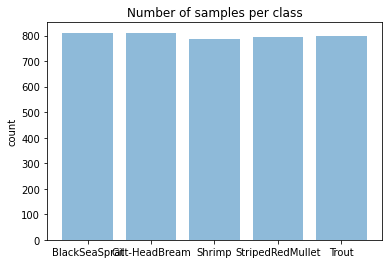

[2653, 2586, 1501, 2468, 705]


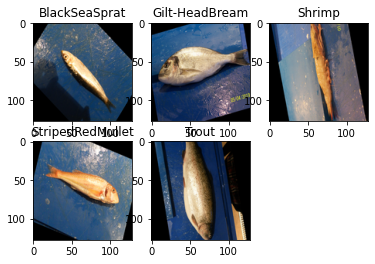

In [ ]:
# Plot the number of samples per class
#### ADD YOUR CODE HERE ####

countingstrs = []

for i in range(5):
  count = np.count_nonzero(dataset.Y_train == i)
  countingstrs.append(count)

countingstrs = np.asarray(countingstrs)
classes = ['BlackSeaSprat', 'Gilt-HeadBream', 'Shrimp', 'StripedRedMullet', 'Trout']

plt.bar(classes, countingstrs, align='center', alpha=0.5)
plt.ylabel('count')
plt.title('Number of samples per class')

plt.show()



# Plot 1 sample from each of the five classes in the training set
#### ADD YOUR CODE HERE ####

num=0
index_picker = []

for num in range(5):
  for index in dataset.idxs_train:
      if dataset.Y_train[index]==num: 
          index_picker.append(index)
          break
print(index_picker)

plt.figure
c_index = 0
for i in index_picker:
    plt.subplot(2,3,c_index + 1)
    to_pil = transforms.ToPILImage()
    training_data = to_pil(dataset.X_train[i])      #.transpose(1,2,0)
    plt.imshow(training_data,cmap='gray')
    plt.title(classes[c_index])
    c_index += 1

### Step 2.2: Discussion. (10 points)

* Is the dataset balanced?

* Can you think of 3 ways to make the dataset balanced if it is not?

* Is the dataset already pre-processed? If yes, how?

#### The dataset is balanced, as the 5 classes have approixmately equal number of samples in the training set, at around 800. ####
#### First, downsampling/upsampling of the datacan make the dataset balanced. Reducing the excessive number of samples in a certain class, or increasing the number of samples in a class in which samples are insufficient. ###
#### Secondly , applying weights to classes can help to mitigate imbalanced data set.####
#### Lastly, data augmentation allows us to artificially increase the number of samples from the existing samples for a class with insufficient samples. ####
#### The dataset has been pre-processed as it has been reshaped in to 128 * 128 dimension. ####

## Step 3: Multiclass classification. (55 points)
In this section we will try to make a multiclass classifier to determine the species of the fish.

### Step 3.1: Define the model. (15 points)

Design a neural network which consists of a number of convolutional layers and a few fully connected ones at the end.

The exact architecture is up to you but you do NOT need to create something complicated. For example, you could design a LeNet insprired network.

In [ ]:
class Net(nn.Module):
    def __init__(self, output_dims = 1):
        super(Net, self).__init__()
        #### ADD YOUR CODE HERE ####
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = (5,5), padding = 0, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = (5,5), padding = 0, stride = 1)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = (5,5), padding = 0, stride = 1)
        #linear neurons
        self.lin1 = nn.Linear(75000, 84)
        self.lin2 = nn.Linear(84, 10)
        #AvgPoolingLayer over (2,2)
        self.pooling = nn.AvgPool2d(kernel_size = 2, stride = 2)
        #activation function
        self.activation = nn.Tanh()



    def forward(self, x):
        # Forward propagation
        #### ADD YOUR CODE HERE ####
      
        x = self.conv1(x)
        x = self.activation(x)
        x = self.pooling(x)

        x = self.conv2(x)
        x = self.activation(x)
        x = self.pooling(x)

        x = self.conv3(x)
        x = self.activation(x)

        x = self.flatten(x)

        x = self.lin1(x)
        x = self.activation(x)
        x = self.lin2(x)

        return x

# Since most of you use laptops, you may use CPU for training.
# If you have a good GPU, you can set this to 'gpu'.
device = 'cpu'



### Step 3.2: Define the training parameters. (10 points)

- Loss function
- Optimizer
- Learning Rate
- Number of iterations
- Batch Size
- Other relevant hyperparameters

In [ ]:
# Network
model = Net().to(device)


# Loss function
criterion = nn.CrossEntropyLoss()

# Optimiser and learning rate
lr = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr)

# Number of iterations for training
epochs = 20

# Training batch size
train_batch_size = 64

# Based on the FishDataset, use the PyTorch DataLoader to load the data during model training
train_dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=128, train=True)
train_dataloader = torch.utils.data.DataLoader(train_dataset, train_batch_size, shuffle=True)
test_dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=128, train=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Step 3.3: Train the model. (15 points)

Complete the training loop.

In [ ]:
for epoch in tqdm(range(epochs)):
    model.train()
    loss_curve = []
    
    for imgs, labs in train_dataloader:
        # Get a batch of training data and train the model
        #### ADD YOUR CODE HERE ####
        imgs = imgs.to(device)
        labs = labs.to(device)

        #forward pass
        output = model(imgs)
        loss = criterion(output, labs)

        #backward, optimise
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       
        loss_curve += [loss.item()]
    print('--- Iteration {0}: training loss = {1:.4f} ---'.format(epoch + 1, np.array(loss_curve).mean()))

  5%|▌         | 1/20 [00:38<12:02, 38.04s/it]

--- Iteration 1: training loss = 0.9100 ---


 10%|█         | 2/20 [01:15<11:20, 37.79s/it]

--- Iteration 2: training loss = 0.7315 ---


 15%|█▌        | 3/20 [01:53<10:43, 37.87s/it]

--- Iteration 3: training loss = 0.6194 ---


 20%|██        | 4/20 [02:31<10:02, 37.68s/it]

--- Iteration 4: training loss = 0.5125 ---


 25%|██▌       | 5/20 [03:07<09:21, 37.42s/it]

--- Iteration 5: training loss = 0.4363 ---


 30%|███       | 6/20 [03:44<08:41, 37.23s/it]

--- Iteration 6: training loss = 0.3741 ---


 35%|███▌      | 7/20 [04:22<08:04, 37.25s/it]

--- Iteration 7: training loss = 0.2914 ---


 40%|████      | 8/20 [04:59<07:25, 37.16s/it]

--- Iteration 8: training loss = 0.2458 ---


 45%|████▌     | 9/20 [05:36<06:48, 37.10s/it]

--- Iteration 9: training loss = 0.1949 ---


 50%|█████     | 10/20 [06:14<06:13, 37.40s/it]

--- Iteration 10: training loss = 0.1651 ---


 55%|█████▌    | 11/20 [06:51<05:35, 37.25s/it]

--- Iteration 11: training loss = 0.1354 ---


 60%|██████    | 12/20 [07:29<05:01, 37.64s/it]

--- Iteration 12: training loss = 0.1049 ---


 65%|██████▌   | 13/20 [08:07<04:23, 37.63s/it]

--- Iteration 13: training loss = 0.0796 ---


 70%|███████   | 14/20 [08:44<03:44, 37.41s/it]

--- Iteration 14: training loss = 0.0618 ---


 75%|███████▌  | 15/20 [09:21<03:06, 37.27s/it]

--- Iteration 15: training loss = 0.0508 ---


 80%|████████  | 16/20 [09:58<02:28, 37.19s/it]

--- Iteration 16: training loss = 0.0419 ---


 85%|████████▌ | 17/20 [10:35<01:51, 37.28s/it]

--- Iteration 17: training loss = 0.0365 ---


 90%|█████████ | 18/20 [11:12<01:14, 37.25s/it]

--- Iteration 18: training loss = 0.0315 ---


 95%|█████████▌| 19/20 [11:49<00:37, 37.22s/it]

--- Iteration 19: training loss = 0.0269 ---


100%|██████████| 20/20 [12:27<00:00, 37.38s/it]

--- Iteration 20: training loss = 0.0234 ---


### Step 3.4: Deploy the trained model onto the test set. (10 points)

In [ ]:
# Deploy the model
#### ADD YOUR CODE HERE ####
with torch.no_grad():
    correct = 0
    total = 0
    for imgs, labs in test_dataloader:
        imgs = imgs.to(device)
        labs = labs.to(device)
        output = model(imgs)
        optimizer.zero_grad()
        loss = criterion(output, labs)
        

### Step 3.5: Evaluate the performance of the model and visualize the confusion matrix. (5 points)

You can use sklearns related function.

In [ ]:
#### ADD YOUR CODE HERE ####
_, predicted = torch.max(output.data, 1)
total += labs.size(0)
correct += (predicted == labs).sum().item()

print('Test accuracy on the {} test images: {} %'.format(1000, 100 * correct / total))


Test accuracy on the 1000 test images: 95.0 %


## Step 4: Finetune your classifier. (15 points)

In the previous section, you have built a pretty good classifier for certain species of fish. Now we are going to use this trained classifier and adapt it to classify a new set of species:

    'Hourse Mackerel
    'Red Mullet',
    'Red Sea Bream'
    'Sea Bass'

### Step 4.1: Set up the data for new species. (2 points)
Overwrite the labels correspondances so they only incude the new classes and regenerate the datasets and dataloaders.

In [ ]:
Multiclass_labels_correspondances ={
    'Hourse Mackerel': 0,
    'Red Mullet': 1,
    'Red Sea Bream': 2,
    'Sea Bass': 3}

LENDATA = 4000
idxs_train,idxs_test = split_train_test(LENDATA, 0.8)

# Dataloaders
#### ADD YOUR CODE HERE ####
train_dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=128, train=True)
train_dataloader = torch.utils.data.DataLoader(train_dataset, train_batch_size, shuffle=True)
test_dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=128, train=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

(3200,)
(800,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Step 4.2: Freeze the weights of all previous layers of the network except the last layer. (5 points)

You can freeze them by setting the gradient requirements to ```False```.

In [ ]:
def freeze_till_last(model):
    for param in model.parameters():
        param.requires_grad = False

freeze_till_last(model)
# Modify the last layer. This layer is not freezed.
#### ADD YOUR CODE HERE ####

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimiser and learning rate
lr = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr)

# Number of iterations for training
epochs = 20

# Training batch size
train_batch_size = 64

### Step 4.3: Train and test your finetuned model. (5 points)

In [ ]:
# Finetune the model
for epoch in tqdm(range(epochs)):
    #### ADD YOUR CODE HERE ####
    model.train()
    loss_curve = []
    
    for imgs, labs in train_dataloader:
        # Get a batch of training data and train the model
        #### ADD YOUR CODE HERE ####
        imgs = imgs.to(device)
        labs = labs.to(device)

        #forward pass
        output = model(imgs)
        loss = criterion(output, labs)

        #backward, optimise
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       
        loss_curve += [loss.item()]
    print('--- Iteration {0}: training loss = {1:.4f} ---'.format(epoch + 1, np.array(loss_curve).mean()))


# Deploy the model on the test set
#### ADD YOUR CODE HERE ####
with torch.no_grad():
    correct = 0
    total = 0
    for imgs, labs in test_dataloader:
        imgs = imgs.to(device)
        labs = labs.to(device)
        output = model(imgs)
        optimizer.zero_grad()
        loss = criterion(output, labs)

# Evaluate the performance
#### ADD YOUR CODE HERE ####
_, predict = torch.max(output.data, 1)
total += labs.size(0)
correct += (predict == labs).sum().item()

print('Finetuned Test accuracy on the {} test images: {} %'.format(800, 100 * correct / total))

  0%|          | 0/20 [00:00<?, ?it/s]


RuntimeError: ignored

### Step 4.4: Did finetuning work? Why did we freeze the first few layers? (3 points)

#### ADD YOUR RESPONSE HERE ####

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('temp_coursework_02.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/temp_coursework_02.ipynb to pdf
[NbConvertApp] Support files will be in temp_coursework_02_files/
[NbConvertApp] Making directory ./temp_coursework_02_files
[NbConvertApp] Making directory ./temp_coursework_02_files
[NbConvertApp] Writing 73544 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: [u'xelatex', u'./notebook.tex', '-quiet']
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'